# Проект: Исследование надежности заемщиков

## Описание проекта

Заказчик проекта - кредитный отдел банка. В рамках проекта проводится исследование данных о клиентах с целью анализа факторов, связанных с погашением кредита. Рассматривается влияние семейного положения и количества детей заёмщика на факт возврата кредита в установленный срок. Полученные результаты могут быть использованы в аналитических и прикладных задачах кредитного анализа.

## Цель проекта

Определить, как семейное положение и количество детей клиента влияют на вероятность погашения кредита в срок и могут ли эти факторы быть использованы при построении модели кредитного скоринга, оценивающей кредитоспособность потенциальных заёмщиков.

## Описание данных
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

## Подготовка рабочего пространства

In [1]:
import pandas as pd

In [2]:
# уберем лишние предупреждения
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1 Загрузка данных

In [3]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Выведем первые 20 строчек датафрейма data на экран.

In [4]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 2. Предобработка данных

**2.1 Обработка пропусков**

Выведем количество пропущенных значений для каждого столбца

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Заполним пропуски медианным значением по каждому типу из столбца `income_type`

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

**2.2 Обработка аномальных значений**

Заменим отрицательные значения в столбце `days_employed` на положительные

In [8]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

Выведем перечень уникальных значений столбца `children`

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

**2.3 Удаление пропусков**

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**2.4 Изменение типов данных**

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`

In [15]:
data['total_income'] = data['total_income'].astype(int)

**2.5 Обработка дубликатов**

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [16]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных

In [17]:
data.duplicated().sum()

np.int64(71)

Удалим дубликаты

In [18]:
data = data.drop_duplicates()

**2.6 Категоризация данных**

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## 3. Исследовательский анализ данных

**3.1 Посмотрим есть ли зависимость между количеством детей и возвратом кредита в срок**

**Сгруппируем всех клиентов по количеству детей**

In [24]:
clients_by_children = data.groupby('children')['debt'].count()
print(clients_by_children)

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64


**Для каждой группы посчитаем количество клиентов, имевших задолженность по возврату кредитов**

In [25]:
debtors_by_children = data[data['debt'] == 1].groupby('children')['debt'].count()
print(debtors_by_children)

children
0    1063
1     444
2     194
3      27
4       4
Name: debt, dtype: int64


**Найдем долю клиентов с задолженностями по возврату кредитов в каждой группе**

In [26]:
debtors_ratio = debtors_by_children / clients_by_children
print(debtors_ratio)

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5         NaN
Name: debt, dtype: float64


**Выведем сводную таблицу**

In [27]:
# Создаем копию датасета
temp = data.copy()
# Напишем функцию
def que(category):
    data_temp = temp.pivot_table(index=category, values='debt', aggfunc=['count', 'sum', 'mean'])
    data_temp.columns = ['Всего кредитополучателей', 'Всего должников', 'Доля должников']
    # Оформим таблицу цветным градиентом, но можно ее вывести и просто display(data_temp)
    display(data_temp)
    
que('children')

,Всего кредитополучателей,Всего должников,Доля должников
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


**Визуализируем результаты**

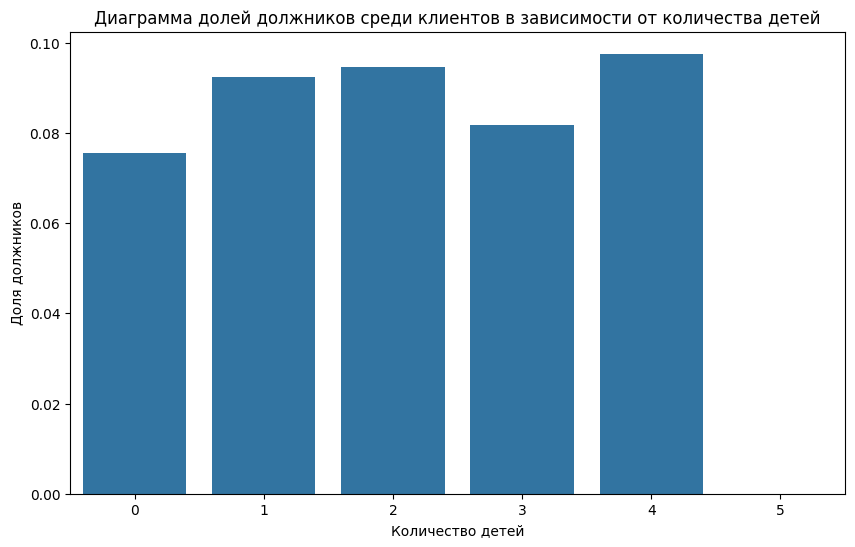

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
df = debtors_ratio.reset_index()
df.columns = ['children', 'debtors_ratio']
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='debtors_ratio', data=df)
plt.xlabel('Количество детей')
plt.ylabel('Доля должников')
plt.title('Диаграмма долей должников среди клиентов в зависимости от количества детей')
plt.show()

**Из диаграммы следует, что клиенты с детьми чеще имеют проблемы с задолженностями по кредиту.**

**Найдем во сколько раз чаще клиенты с детьми имели задолженность по возврату кредитов.**

In [29]:
# количество клиентов с детьми
parents = data[data['children'] != 0]['debt'].count().sum()
print(parents)

7240


In [30]:
# количество клиентов с детьми, имевших задолженность по возврату кредитов
parents_debtors = data[data['children'] != 0]['debt'].sum()
print(parents_debtors)

669


In [31]:
# доля клиентов с детьми, имевших задолженность по возврату кредитов
parents_debtors_ratio = parents_debtors / parents
print(parents_debtors_ratio)

0.09240331491712707


**Найдем во сколько раз чаще клиенты с детьми имели задолженность по возврату кредитов.**

In [32]:
print(parents_debtors_ratio / debtors_ratio[0])

1.224887215895802


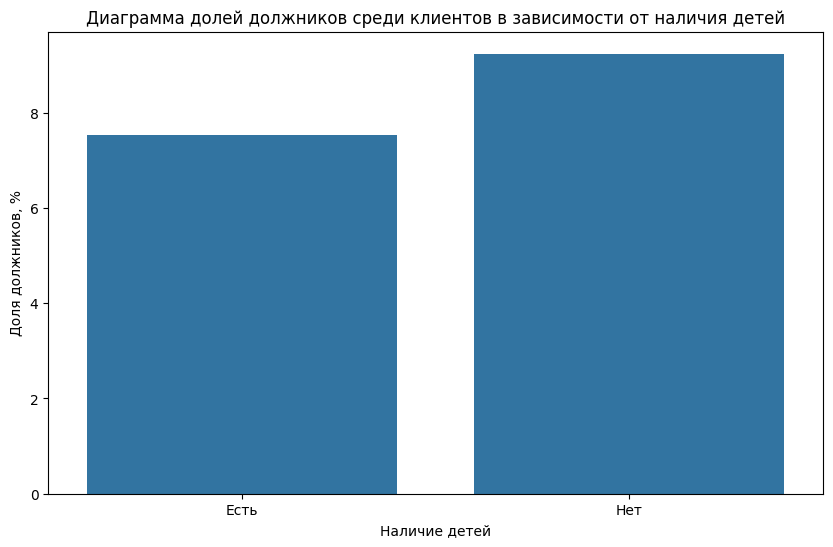

In [33]:
df1 = pd.DataFrame({
    'children': ['Есть', 'Нет'],
    'debt': [debtors_ratio[0]*100, parents_debtors_ratio*100]
})
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='debt', data=df1)
plt.xlabel('Наличие детей')
plt.ylabel('Доля должников, %')
plt.title('Диаграмма долей должников среди клиентов в зависимости от наличия детей')
plt.show()

**Вывод:** 

**Клиенты с детьми имеют задолженность по возврату кредитов на 22,5% чаще клиентов без детей.**

Нет однозначной корелляции между количеством детей и вероятностью задолженности по кредиту. Из представленных данных следует, что клиенты с 4 детьми имеют проблемы с оплатой задолженности чаще других клиентов. Среди клиентов, у которых имеется 5 детей, не было ни одного должника. Выборку из 9 клиентов можно считать не репрезентативной. При большем количестве данных можно будет получить более точную зависимость между количеством детей и вероятностью задолженности по возврату кредита. 



**3.2 Посмотрим, есть ли зависимость между семейным положением и возвратом кредита в срок**

**Посмотрим какие варианты семейных статусов встречаются в датасете.**

In [34]:
print(data['family_status'].value_counts())

family_status
женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: count, dtype: int64


**Сгруппируем всех клиентов по семейному статусу.**

In [35]:
clients_by_family_status = data.groupby('family_status')['debt'].count()
print(clients_by_family_status)

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: debt, dtype: int64


**Для каждой группы посчитаем количество клиентов, имевших задолженность по возврату кредитов.**

In [36]:
debtors_by_family_status = data[data['debt'] == 1].groupby('family_status')['debt'].count()
print(debtors_by_family_status)

family_status
Не женат / не замужем    273
в разводе                 84
вдовец / вдова            63
гражданский брак         385
женат / замужем          927
Name: debt, dtype: int64


**Найдем долю клиентов с задолженностями по возврату кредитов в каждой группе.**

In [37]:
debtors_ratio_fs = debtors_by_family_status / clients_by_family_status
print(debtors_ratio_fs)

family_status
Не женат / не замужем    0.097639
в разводе                0.070648
вдовец / вдова           0.066246
гражданский брак         0.093130
женат / замужем          0.075606
Name: debt, dtype: float64


**Визуализируем результаты.**

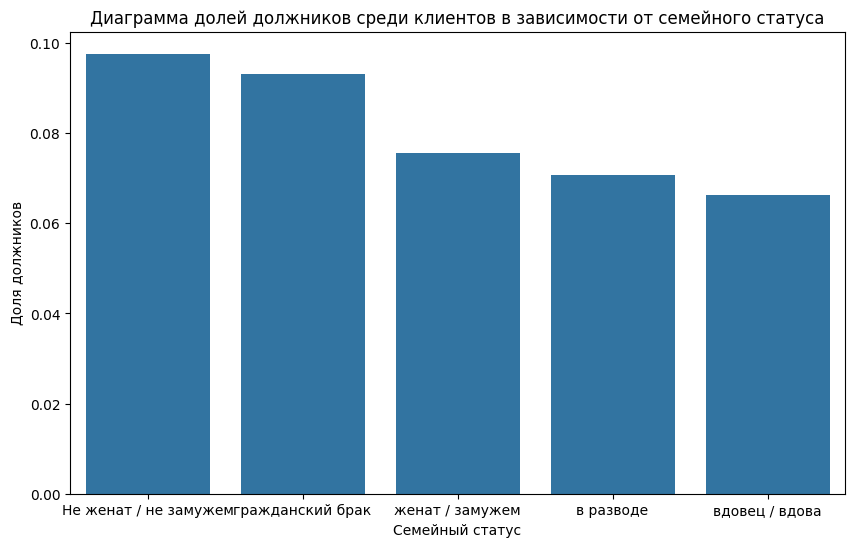

In [38]:
df2 = debtors_ratio_fs.reset_index()
df2.columns = ['family_status', 'debtors_ratio']
# Отсортируем по убыванию
df2 = df2.sort_values(by='debtors_ratio', ascending=False)
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='family_status', y='debtors_ratio', data=df2)
plt.xlabel('Семейный статус')
plt.ylabel('Доля должников')
plt.title('Диаграмма долей должников среди клиентов в зависимости от семейного статуса')
plt.show()

**Вывод:** 

**Клиенты, не состоящие и не состоявшие в браке, имеют задолженности по возврату кредитов чаще клиентов в браке. Клиенты в разводе и вдовы/вдовцы реже имеют задолженности по возврату кредитов.**

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Сгруппируем всех клиентов по уровню дохода.**

In [39]:
clients_by_income = data.groupby('total_income_category')['debt'].count()
print(clients_by_income)

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64


**Для каждой группы посчитаем количество клиентов, имевших задолженность по возврату кредитов.**

In [40]:
debtors_by_income = data[data['debt'] == 1].groupby('total_income_category')['debt'].count()
print(debtors_by_income)

total_income_category
A       2
B     354
C    1353
D      21
E       2
Name: debt, dtype: int64


**Найдем долю клиентов с задолженностями по возврату кредитов в каждой группе.**

In [41]:
debtors_ratio_income = debtors_by_income / clients_by_income
print(debtors_ratio_income)

total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64


**Визуализируем результаты.**

Приведем для справки диапазоны соответствующие категориям по уровню дохода:
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

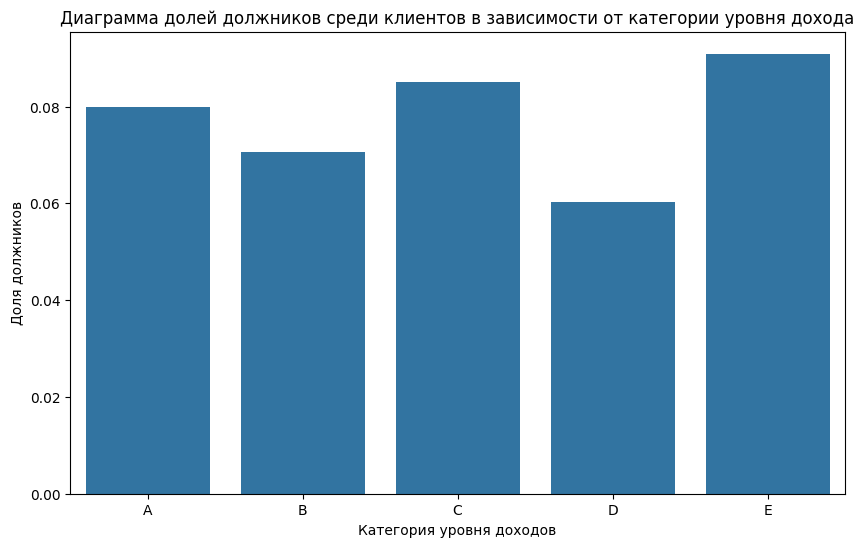

In [42]:
df3 = debtors_ratio_income.reset_index()
df3.columns = ['total_income_category', 'debtors_ratio']

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='total_income_category', y='debtors_ratio', data=df3)
plt.xlabel('Категория уровня доходов')
plt.ylabel('Доля должников')
plt.title('Диаграмма долей должников среди клиентов в зависимости от категории уровня дохода')
plt.show()

**Вывод:** 

Количество клиентов категорий А - 25 человек, категории Е - 22 человека, что является малой выборкой для проведения качественного анализа. Большая часть клиентов попадает в категории по уровню дохода В и C. Для получения более точных результатов предложил бы собрать больше данных и увеличить количество категорий и/или изменить диапазоны доходов в категориях.

На основе полученных данных можно сделать следующий вывод: 

**Клиенты с доходом от 50001 до 200000 чаще имеют проблемы с задолженостью по возврату кредитов.** 

**Проведем дополнительный анализ зависимости между уровнем дохода и возвратом кредита в срок.**

Разобъем клиентов на равные выборки методом `.qcut` и добавим в датафрейм `data` дополнительный столбец `quantile_income_group`.

In [43]:
data['quantile_income_group'] = pd.qcut(data['total_income'], q=7)
print(data['quantile_income_group'].head(5))

0     (242009.286, 2265604.0]
1     (87287.143, 113563.429]
2    (137465.286, 155313.571]
3     (242009.286, 2265604.0]
4    (155313.571, 184554.286]
Name: quantile_income_group, dtype: category
Categories (7, interval[float64, right]): [(20666.999, 87287.143] < (87287.143, 113563.429] < (113563.429, 137465.286] < (137465.286, 155313.571] < (155313.571, 184554.286] < (184554.286, 242009.286] < (242009.286, 2265604.0]]


**Посмотрим количество клиентов в каждой группе, количество должников и долю должников.**

In [44]:
clients_by_quantile_income_group = data.groupby('quantile_income_group', observed=True)['debt'].count()
debtors_by_quantile_income_group = data[data['debt'] == 1].groupby('quantile_income_group', observed=True)['debt'].count()
debtors_ratio_quantile_income_group = debtors_by_quantile_income_group / clients_by_quantile_income_group

#соберем данные в единую таблицу
agg_table = pd.DataFrame({
    'Количество клиентов группе': clients_by_quantile_income_group,
    'Количество должников': debtors_by_quantile_income_group,
    'Доля должников': debtors_ratio_quantile_income_group
})
agg_table

,Количество клиентов группе,Количество должников,Доля должников
quantile_income_group,,,
"(20666.999, 87287.143]",3048,233,0.076444
"(87287.143, 113563.429]",3047,262,0.085986
"(113563.429, 137465.286]",3047,263,0.086314
"(137465.286, 155313.571]",3047,264,0.086643
"(155313.571, 184554.286]",3047,257,0.084345
"(184554.286, 242009.286]",3047,242,0.079422
"(242009.286, 2265604.0]",3048,211,0.069226


Сделаем цикл с перебором количества категорий

In [45]:
temp = data.copy()
start, stop = 3, 8 # начальное и конечное количество категорий
while start <= stop:
    temp['new_category'] = pd.qcut(temp['total_income'], q=start, precision=0)
    que('new_category')
    start += 1

,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 119218.0]",7110,580,0.081575
"(119218.0, 172357.0]",7239,627,0.086614
"(172357.0, 2265604.0]",6982,525,0.075193


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 107507.0]",5333,427,0.080068
"(107507.0, 142594.0]",5450,480,0.088073
"(142594.0, 195842.0]",5216,444,0.085123
"(195842.0, 2265604.0]",5332,381,0.071455


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 98514.0]",4267,344,0.080619
"(98514.0, 132113.0]",4266,358,0.083919
"(132113.0, 161380.0]",4266,373,0.087436
"(161380.0, 214604.0]",4266,358,0.083919
"(214604.0, 2265604.0]",4266,299,0.070089


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 92092.0]",3555,285,0.080169
"(92092.0, 119218.0]",3555,295,0.082982
"(119218.0, 142594.0]",3673,327,0.089028
"(142594.0, 172357.0]",3566,300,0.084128
"(172357.0, 228893.0]",3427,276,0.080537
"(228893.0, 2265604.0]",3555,249,0.070042


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 87287.0]",3048,233,0.076444
"(87287.0, 113563.0]",3047,262,0.085986
"(113563.0, 137465.0]",3047,263,0.086314
"(137465.0, 155314.0]",3047,264,0.086643
"(155314.0, 184554.0]",3047,257,0.084345
"(184554.0, 242009.0]",3047,242,0.079422
"(242009.0, 2265604.0]",3048,211,0.069226


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 83837.0]",2667,206,0.077240
"(83837.0, 107507.0]",2666,221,0.082896
"(107507.0, 127546.0]",2666,233,0.087397
"(127546.0, 142594.0]",2784,247,0.088721
"(142594.0, 166525.0]",2549,223,0.087485
"(166525.0, 195842.0]",2667,221,0.082865
"(195842.0, 254250.0]",2665,196,0.073546
"(254250.0, 2265604.0]",2667,185,0.069366


**Визуализируем результаты**

In [46]:
#Создадим новую таблицу для удобства визуализации
df_quantile = agg_table.reset_index()

In [47]:
df_quantile['quantile_income_group'] = ['до 87', 
                                        '87 - 113', 
                                        '113 - 137', 
                                        '137 - 155', 
                                        '155 - 184', 
                                        '184 - 242', 
                                        'от 242']
print(df_quantile[['quantile_income_group', 'Доля должников']])

  quantile_income_group  Доля должников
0                 до 87        0.076444
1              87 - 113        0.085986
2             113 - 137        0.086314
3             137 - 155        0.086643
4             155 - 184        0.084345
5             184 - 242        0.079422
6                от 242        0.069226


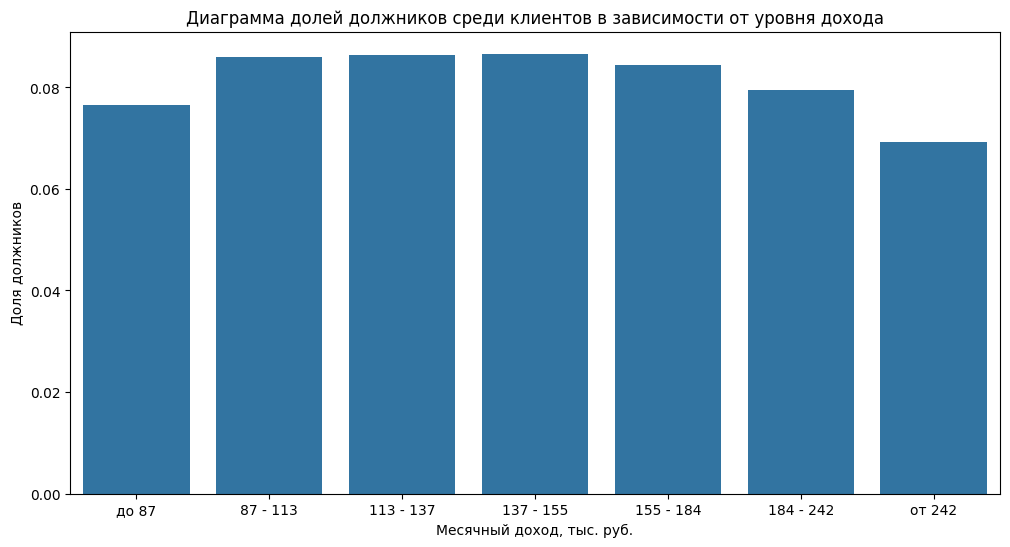

In [48]:
# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x='quantile_income_group', y='Доля должников', data=df_quantile[['quantile_income_group', 'Доля должников']])
plt.xlabel('Месячный доход, тыс. руб.')
plt.ylabel('Доля должников')
plt.title('Диаграмма долей должников среди клиентов в зависимости от уровня дохода')
plt.show()

**Промежуточный вывод:**

Группа клиентов с доходами от 87 до 184 тыс. руб. в месяц имеет наибольшую долю должников по кредитам.

Клиенты с доходами до 87 тыс. руб. имеют меньше проблем с задолженностями по кредитам чем клиенты среднего класса.

Начиная с дохода 155 тыс. руб. в месяц имеется плавное снижение доли клиентов с задолженностями по кредитам.

**3.4 Исследуем, как разные цели кредита влияют на его возврат в срок**

**Сгруппируем всех клиентов по целям кредита.**

In [49]:
clients_by_purpose_category = data.groupby('purpose_category')['debt'].count()
print(clients_by_purpose_category)

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64


**Для каждой группы посчитаем количество клиентов, имевших задолженность по возврату кредитов.**

In [50]:
debtors_by_purpose_category = data[data['debt'] == 1].groupby('purpose_category')['debt'].count()
print(debtors_by_purpose_category)

purpose_category
операции с автомобилем      400
операции с недвижимостью    780
получение образования       369
проведение свадьбы          183
Name: debt, dtype: int64


**Найдем долю клиентов с задолженностями по возврату кредитов в каждой группе.**

In [51]:
debtors_ratio_purpose_category = debtors_by_purpose_category / clients_by_purpose_category
print(debtors_ratio_purpose_category)

purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64


**Визуализируем результаты.**

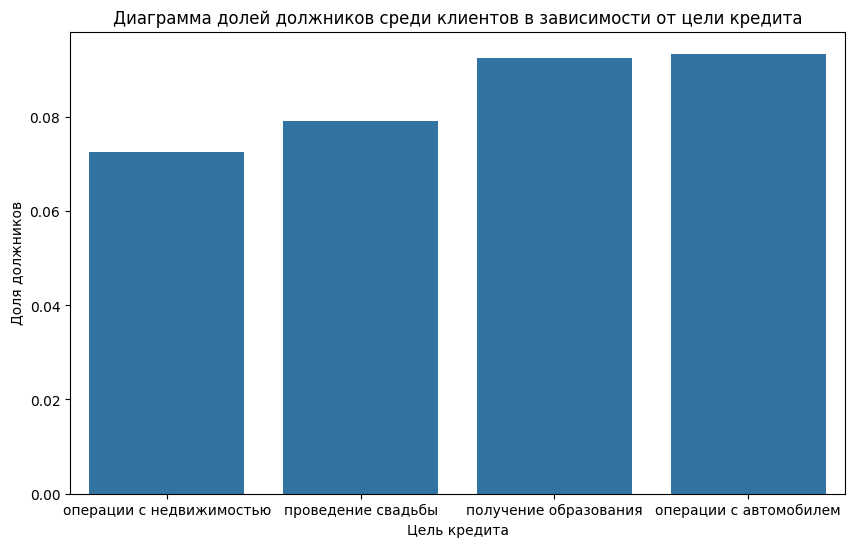

In [52]:
df4 = debtors_ratio_purpose_category.reset_index()
df4.columns = ['purpose_category', 'debtors_ratio']
# Отсортируем по возрастанию
df4 = df4.sort_values(by='debtors_ratio', ascending=True)
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='purpose_category', y='debtors_ratio', data=df4)
plt.xlabel('Цель кредита')
plt.ylabel('Доля должников')
plt.title('Диаграмма долей должников среди клиентов в зависимости от цели кредита')
plt.show()

**Промежуточный вывод:** 

Клиенты, берущие кредит с целью проведения операций с недвижимостью, имеют наименьшую долю задолженностей по возврату кредитов

Наибольший процент клиентов, имеющих проблемы с задолженностью по возврату кредитов, берут займы на получение образования и операции с автомобилями

## Общий вывод

**Цель исследования** заключалась в определении влияния семейного положения и количества детей клиента на факт погашения кредита в срок.

Входными данными являлась статистика о платёжеспособности клиентов.

В ходе предобработки предоставленных данных были обнаружены:
* Аномалии в столбцах со стажем и количеством детей. Отрицательные числа в столце со стажем были заменены на положительные. Аномально большие значения стажа у безработных и пенсионеров оставили без изменения, так как данная информация не использовалась в исследовании. Строки с аномальным количеством детей были удалены.
* Пропуски в столбцах с информацией о стаже и доходах. Так как на величину дохода сильнее всего влияет тип занятости, пропуски в столбце с доходом были заполнены медианным значением по каждому типу занятости из столбца. Пропуски в столбце со стажем также были заполнены медианным значением по каждому типу занятости.
* Несоответствие типов данных. Тип данных в столбце с данными о доходах был приведен к целочисленному типу.
* Дубликаты. Были удалены стандартными методами.

Для удобства анализа была проведена категоризация данных в столбцах с доходами и целью кредитования.

По результатам исследования можно сделать следующие **выводы:**
* Клиенты с детьми имеют задолженность по возврату кредитов на 22,5% чаще клиентов без детей.
* Клиенты, не состоящие и не состоявшие в браке, имеют задолженности по возврату кредитов чаще клиентов в браке.
* Клиенты в разводе и вдовы/вдовцы реже имеют задолженности по возврату кредитов, по сравнению с клиентами в браке, гражданском браке или не состоящими в браке.

Также были исследованы **зависимости возврата кредита в срок от уровня дохода и целей кредитования:**
* Группа клиентов с доходами от 87 до 184 тыс. руб. в месяц имеют наибольшую долю должников по кредитам. Клиенты с доходами до 87 тыс. руб. имеют меньше проблем с задолженностями по кредитам чем клиенты среднего класса. Начиная с дохода 155 тыс. руб. в месяц имеется плавное снижение доли клиентов с задолженностями по кредитам.
* Группа клиентов, берущих кредит с целью проведения операций с недвижимостью, имеет наименьшую долю задолженностей по возврату кредитов. Наибольший процент клиентов, имеющих проблемы с задолженностью по возврату кредитов, берут займы на получение образования и операции с автомобилями.